# Reconhecimento de Padrões - trabalho computacional

### Importando dados

In [5]:
import numpy as np
import pandas as pd

# função para divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split

Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)
Histopathological Attributes: (take values 0, 1, 2, 3)

* 1: erythema
* 2: scaling
* 3: definite borders
* 4: itching
* 5: koebner phenomenon
* 6: polygonal papules
* 7: follicular papules
* 8: oral mucosal involvement
* 9: knee and elbow involvement
* 10: scalp involvement
* 11: family history, (0 or 1)
* 34: Age (linear)


* 12: melanin incontinence
* 13: eosinophils in the infiltrate
* 14: PNL infiltrate
* 15: fibrosis of the papillary dermis
* 16: exocytosis
* 17: acanthosis
* 18: hyperkeratosis
* 19: parakeratosis
* 20: clubbing of the rete ridges
* 21: elongation of the rete ridges
* 22: thinning of the suprapapillary epidermis
* 23: spongiform pustule
* 24: munro microabcess
* 25: focal hypergranulosis
* 26: disappearance of the granular layer
* 27: vacuolisation and damage of basal layer
* 28: spongiosis
* 29: saw-tooth appearance of retes
* 30: follicular horn plug
* 31: perifollicular parakeratosis
* 32: inflammatory monoluclear inflitrate
* 33: band-like infiltrate

In [7]:
df = pd.read_csv('dados/dermatology.data', header=None)

In [8]:
# substituindo valores nulos da coluna de idade e transforomando para inteiro
df[33] = df[33].apply(lambda x: '0' if x == '?' else x).astype('int')

### definindo variável target

In [9]:
y_col = 10

## 1. kNN para cada uma das seguintes distâncias: quarteirão e euclidiana

### Descrição do algoritmo:

1. Receber um vetor x de entrada para classificação.
2. Calcular a distância desse vetor para todos os outros dados.
3. Selecionar os k vetores mais próximos a x, onde k é o número pré-determinado de vizinhos.
4. Baseado nesses k dados, escolher a classe mais frequente entre eles para o vetor x.
5. Retornar essa classe.

In [10]:
# importando função para calcular distâncias
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from sklearn.preprocessing import StandardScaler

In [11]:
# função para cálculo das distâncias
def get_distances(X_train, x, distance = 'euclidean'):
    if distance == 'euclidean':
        dists = pd.Series(euclidean_distances(X_train, [x]).reshape(len(X_train), ), index=X_train.index)
    else:
        dists = pd.Series(manhattan_distances(X_train, [x]).reshape(len(X_train), ), index=X_train.index)
    return dists

# retorna k vizinhos mais próximos a um determinado dado
def get_neighbors(X_train, k, x, y, distance = 'euclidean'):
    distances = get_distances(X_train, x, distance)
    neighbors_index = distances.sort_values()[:k].index
    return X_train.loc[neighbors_index]

def get_knn_prediction(X_train, y_train, k, x, y, distance = 'euclidean'):
    '''
        Classifies some point x based on the k nearest points
        
        params:
            df: pandas.DataFrame, the data to get the features and neighbors from
            k: int, number of neighbors
            x: pd.Series, a row from df to be classified
            y: the target column from df
            distance: str, defines if the distance used in the algorith is euclidean or manhattan. 
                Default: 'euclidean'
        
        returns: int, calculated class for x
    '''
    neighbors_index = get_neighbors(X_train, k, x, y, distance = distance).index
    neighbors_values = y_train.loc[neighbors_index]
    prediction = neighbors_values.value_counts().index[0]
    return prediction

def knn_predict(X_train, y_train, X_test, k, y, distance = 'euclidean'):
    preds = []
    for x in X_test.values:
        preds.append(get_knn_prediction(X_train, y_train, k, x, y, distance=distance))
    return np.array(preds)

## Treino e teste do knn - distância euclidiana

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(y_col, axis=1), df[y_col], 
                                  test_size = 0.2, random_state = 42)

In [13]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [14]:
# cross-validation to find optimal k based on the f1 score
f1 = []
for k in range(1, 21):
    knn_pred = knn_predict(X_train, y_train, X_test, k, y_col)
    f1.append(f1_score(y_test, knn_pred))

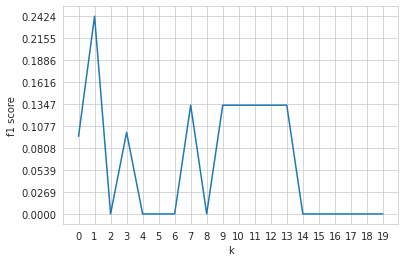

In [15]:
plt.plot(f1)
plt.xlabel('k')
plt.ylabel('f1 score')
plt.xticks(np.arange(20))
plt.yticks(np.linspace(0, max(f1), 10));

In [16]:
y_pred_knn = knn_predict(X_train, y_train, X_test, 1, y_col)

In [17]:
k = 7
print('{}-NN Classifier Confusion Matrix:'.format(str(k)))

conf_matrix = pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], 
                               colnames=['Predicted'], margins = False)
conf_matrix

7-NN Classifier Confusion Matrix:


Predicted,0,1
Actual,,
0,54,8
1,11,1


## Treino e teste do knn - distância manhattan

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(y_col, axis=1), df[y_col], 
                                  test_size = 0.2, random_state = 42)

In [19]:
# cross-validation to find optimal k based on the f1 score
f1 = []
for k in range(1, 21):
    knn_pred = knn_predict(X_train, y_train, X_test, k, y_col, distance='manhattan')
    f1.append(f1_score(y_test, knn_pred))

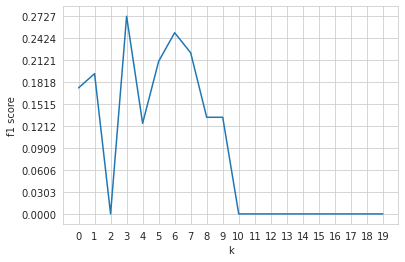

In [20]:
plt.plot(f1)
plt.xlabel('k')
plt.ylabel('f1 score')
plt.xticks(np.arange(20))
plt.yticks(np.linspace(0, max(f1), 10));

In [21]:
y_pred_knn = knn_predict(X_train, y_train, X_test, 3, y_col, distance='manhattan')

In [22]:
k = 7
print('{}-NN Classifier Confusion Matrix:'.format(str(k)))

conf_matrix = pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], 
                               colnames=['Predicted'], margins = False)
conf_matrix

7-NN Classifier Confusion Matrix:


Predicted,0,1
Actual,,
0,58,4
1,12,0


## 2. Classificador gaussiano linear

### Descrição do algoritmo:

1. Definição da função densidade de probabilidade (pdf) - no caso, função gaussiana multivariada.
2. Caĺculo dos parâmetros sigma (covariância dos dados) da pdf para cada classe.
3. Cálculo das porcentagens de frequência de cada classe.
4. Predição baseada no cálculo da probabilidade de cada classe ocorrer, multiplicando a probabilidade da pdf pela porcentagem da classe.
5. A classe selecionada será aquela com maior valor calculado no passo 4.

In [23]:
# função para cálculo da gaussiana multivariada
from scipy.stats import multivariate_normal

In [24]:
class LinearGaussianClassifier:
    
    def fit(self, X_train, y_train):

        # get the data mean value for each class
        self.mean_0 = np.mean(X_train[y_train == 0])
        self.mean_1 = np.mean(X_train[y_train == 1])

        # get covariance (sigma parameter in gaussian distribution) for each class
        self.sigma_0 = np.cov(X_train[y_train == 0], rowvar = False)
        self.sigma_1 = np.cov(X_train[y_train == 1], rowvar = False)

        # get class percentage
        self.p_0 = len(y_train[y_train == 0])/len(y_train)
        self.p_1 = len(y_train[y_train == 1])/len(y_train)

        # get multivariate guassian probability for each class
        self.g_prob_0 = multivariate_normal(self.mean_0, self.sigma_0, allow_singular = True)
        self.g_prob_1 = multivariate_normal(self.mean_1, self.sigma_1, allow_singular = True)
        
    def predict(self, X_test):
        y_pred = []
        
        for x in X_test.values:
            # prediction based on the higher probability distribution function (pdf) for each class
            if self.g_prob_0.pdf(x)*self.p_0 > self.g_prob_1.pdf(x)*self.p_1:
                y_pred.append(0)
            else:
                y_pred.append(1)
                
        return np.array(y_pred)

### Treino e teste do classificador gaussiano linear

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(y_col, axis=1), df[y_col],
                                                    test_size = 0.2, random_state = 42)

In [27]:
lgc = LinearGaussianClassifier()

In [28]:
lgc.fit(X_train, y_train)

In [29]:
y_pred = lgc.predict(X_test)

In [30]:
print('Linear Gaussian Classifier Confusion Matrix:')

conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], 
                               colnames=['Predicted'], margins = False)
conf_matrix

Linear Gaussian Classifier Confusion Matrix:


Predicted,0,1
Actual,,
0,59,3
1,11,1
